# Importing major libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory data analysis

In [7]:
# checking the shape of the data
dataset.shape

(301, 9)

In [8]:
# checking null values
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
numerical_cols=list(dataset.select_dtypes(include=np.number).columns)
categorical_cols=list(dataset.select_dtypes(exclude=np.number).columns)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [11]:
# categorical columns
categorical_cols

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [12]:
# Numerical columns
numerical_cols

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

### Checking unique values in each column

In [16]:
dataset.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

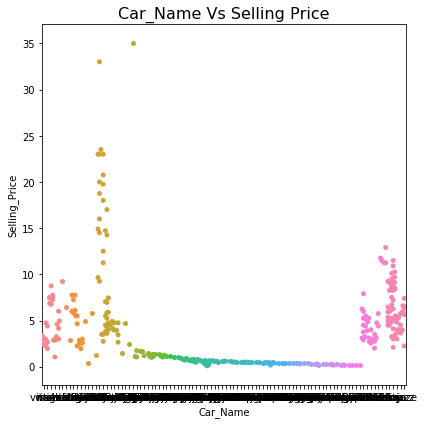

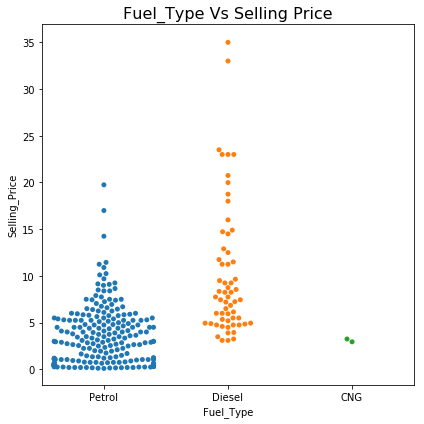

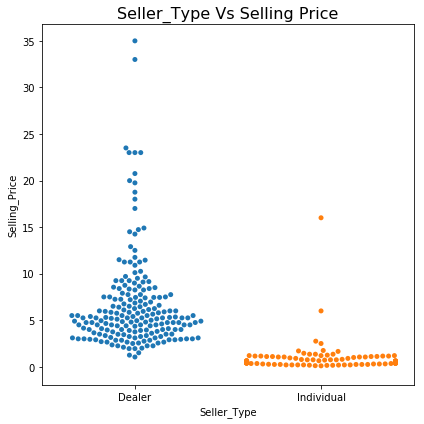

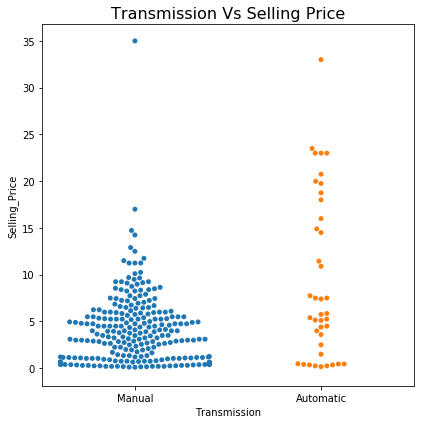

In [29]:

for col in categorical_cols:
    plt.figure(figsize=(6,6))
    plt.subplot(111)
    sns.swarmplot(dataset[col],dataset['Selling_Price'])
    plt.title('{} Vs Selling Price'.format(col), fontsize=16 )
    plt.tight_layout()
    plt.show()
    

In [34]:
# Avoiding carname column
final_dataset=dataset.iloc[:,1:]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


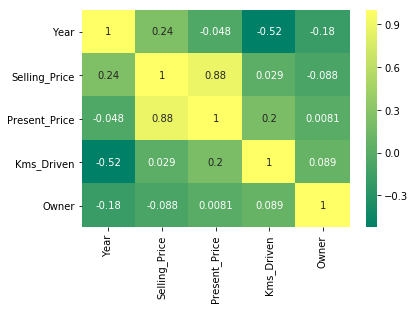

In [38]:
# Checking correlation among features
sns.heatmap(final_dataset.corr(), annot=True,cmap='summer')

In [39]:
final_dataset['current_year']=2020
final_dataset['no_year']=final_dataset['current_year']-final_dataset['Year']
final_dataset.drop(columns=['Year','current_year'], inplace=True)

In [40]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [46]:
final_dataset=pd.get_dummies(final_dataset, drop_first=True)

In [47]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Taking out X and y from the final dataset

In [51]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
       ...  
271     3.00
272     7.50
273     2.25
274     5.30
275    10.90
276     8.65
277     9.70
278     6.00
279     6.25
280     5.25
281     2.10
282     8.25
283     8.99
284     3.50
285     7.40
286     5.65
287     5.75
288     8.40
289    10.11
290     4.50
291     5.40
292     6.40
293     3.25
294     3.75
295     8.55
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Feature importance

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)


C:\Users\ehrikoh.ERICSSON\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
model.feature_importances_

array([4.62863199e-01, 4.89282222e-02, 2.66544582e-04, 7.55191797e-02,
       1.25997939e-01, 4.21374464e-02, 1.50436157e-01, 9.38513123e-02])

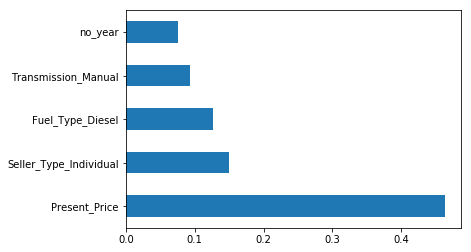

In [60]:
feature_importance=pd.Series(model.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh')

### Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

# Function to fit the model and calculate the score after GridSearch with hypertuned parameters

In [133]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
cv=5
cv_mean=[]
r2_scores=[]
algo=[]

# Main function for models

def run_model(algorithm, X_train,y_train,X_test, y_test):
    algorithm.fit(X_train,y_train)
    y_pred=algorithm.predict(X_test)
    #predictions=pd.DataFrame(y_pred)
    r2=r2_score(y_test,pd.Series(y_pred))
    cross_val=cross_val_score(algorithm,X_train,y_train, cv=cv)
    
    # Appending the results to the list
    
   
    cv_mean.append(np.mean(cross_val))
    r2_scores.append(r2)
    
    
    # Printing the results:
    
    print(" Avg. CV score: ", np.mean(cross_val))
    print("\n")
    print("R2 Score:", r2)
    
    


### RandomForest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [104]:
y_predi

169     0.40
130     0.75
257     8.50
110     1.20
297     4.00
107     1.25
51     23.00
0       3.35
150     0.50
215     4.50
237    11.25
274     5.30
248     4.00
194     0.20
106     1.35
98      7.05
109     1.20
185     0.25
217     3.15
291     5.40
202     4.40
131     0.75
75      3.95
168     0.42
231     9.25
293     3.25
36      4.65
147     0.55
137     0.65
91     11.25
       ...  
120     1.05
189     0.20
32      4.95
111     1.15
281     2.10
234     5.50
272     7.50
24      2.90
72      7.45
79     14.50
275    10.90
187     0.25
243     6.25
59     19.99
142     0.60
149     0.51
73      2.65
216     2.90
263     6.60
235     9.10
125     0.90
208     7.90
13      6.10
143     0.60
33      6.00
3       2.85
232    11.45
10      2.85
280     5.25
213     2.90
Name: Selling_Price, Length: 61, dtype: float64

In [71]:
n_estimators=[int(x) for x in np.linspace(100,1200, num=12)]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10,50]


In [72]:
from sklearn.model_selection import RandomizedSearchCV
# Create parameter grid
random_grid={'n_estimators':[int(x) for x in np.linspace(100,1200, num=12)],
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}


In [95]:
rf_random=RandomizedSearchCV(rf, param_distributions=random_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_iter=10, random_state=42)

In [96]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1100, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 50]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [97]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [88]:
predictions=rf_random.predict(X_test)
predictions

array([ 0.42925831,  0.66049944,  9.6530591 ,  1.16921931,  4.56639892,
        1.08255413, 21.93089381,  4.40166358,  0.55254653,  5.10245412,
        9.78878089,  4.5260998 ,  2.8309998 ,  0.36290808,  2.35546198,
        6.87631466,  1.20011545,  0.33543601,  2.99449201,  5.10267649,
        5.06470819,  0.55673042,  4.63873531,  0.38456547,  7.64640832,
        4.0151902 ,  4.65923528,  0.51109385,  0.48305803,  7.71385073,
        4.3249537 ,  0.86031429,  0.18525033,  4.86465421,  1.15092466,
        2.70142146,  5.13152018,  7.1769889 ,  2.63730756,  6.77739162,
       21.51900624, 10.25749424,  0.24936874,  5.58287177, 22.54397786,
        0.5240494 ,  0.60831344,  3.36208725,  2.99449201,  5.57373397,
        7.63165658,  0.95144476,  6.44381722,  5.50689978,  0.60242371,
        6.38396773,  2.60002961, 11.00433454,  2.82137963,  5.16688597,
        3.40213   ])

### comparing the predicted results and test results

Text(0.5, 1.0, 'Distribution of the predicted results')

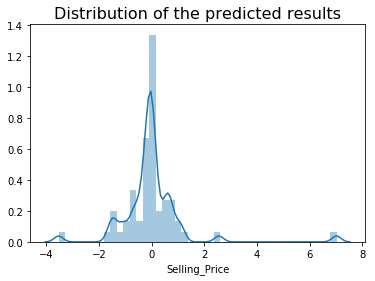

In [93]:
sns.distplot(predictions-y_test)
plt.title("Distribution of the predicted results", fontsize=16)

It can be seen that it is normal distribution with very small width depicting that the results are very good and accurate.

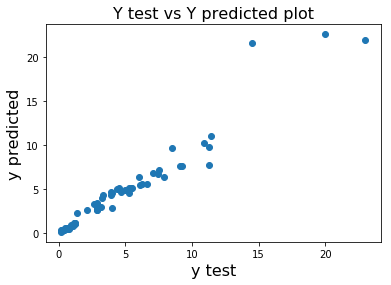

In [94]:
plt.scatter(y_test, predictions)
plt.xlabel('y test',fontsize=16)
plt.ylabel('y predicted',fontsize=16)
plt.title("Y test vs Y predicted plot", fontsize=16)
plt.show()

In [134]:
rf=RandomForestRegressor(n_estimators= 900,
 min_samples_split = 10,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 30)

# Calling model function with this random forest model

run_model(rf, X_train,y_train,X_test,y_test)
algo.append("RandomForest")

 Avg. CV score:  0.8804714915712857


R2 Score: 0.9264957550983695


## Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
run_model(lr,X_train,y_train,X_test,y_test)
algo.append("LinearRegression")

 Avg. CV score:  0.7982246389733798


R2 Score: 0.9102273102240406


## Lasso Regression

In [123]:
from sklearn.linear_model import Lasso

In [124]:
alphas=np.logspace(-3,3,num=14)
alphas
ls=Lasso()

In [126]:
grid=RandomizedSearchCV(ls,param_distributions= {'alpha': alphas}, verbose=True, cv=5, n_iter=10 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'alpha': array([1.00000e-03, 2.89427e-03, 8.37678e-03, 2.42446e-02, 7.01704e-02,
       2.03092e-01, 5.87802e-01, 1.70125e+00, 4.92388e+00, 1.42510e+01,
       4.12463e+01, 1.19378e+02, 3.45511e+02, 1.00000e+03])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [128]:
print(grid.best_score_)

0.8058429103167586


In [131]:
print(grid.best_estimator_.alpha)

0.07017038286703829


In [136]:
ls=Lasso(alpha=grid.best_estimator_.alpha, normalize=True)
run_model(ls, X_train,y_train,X_test,y_test)
algo.append("Lasso")

 Avg. CV score:  0.7388633186985119


R2 Score: 0.7968255782041787


In [138]:
models=['RandomForest', 'LinearRegression', 'Lasso']


final_results=pd.DataFrame(zip(models,cv_mean,r2_scores), columns=['Model', 'CrossVal mean score', 'R2 square'])

final_results

,Model,CrossVal mean score,R2 square
0,RandomForest,0.880471,0.926496
1,LinearRegression,0.798225,0.910227
2,Lasso,0.738863,0.796826


In [142]:
import pickle

file=open('random_forest_pickle', 'wb')
pickle.dump(rf_random, file)

